In [1]:
import rasterio
from rasterio.plot import show
import os.path
import numpy as np
import pandas as pd
from PIL import Image

C:\Users\Akshansh\anaconda3\lib\site-packages\rasterio\__init__.py:334: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


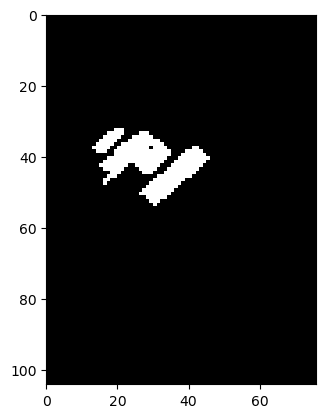

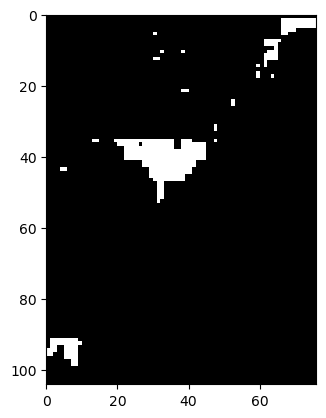

<AxesSubplot:>

In [2]:
img1 = rasterio.open("building2022.png")
img2 = rasterio.open("nn_change.png")

show(img1, cmap='gray')
show(img2, cmap='gray')

In [3]:
z1 = img1.read()
print(z1.shape)
z2 = img2.read()
print(z2.shape)
z1 = np.array(z1,dtype=np.uint8)
z1 = z1*255
z2 = np.array(z2,dtype=np.uint8)
z2 = z2*255
rslt = np.unique(z1)
print(rslt)
rslt = np.unique(z2)
print(rslt)

(1, 104, 76)
(1, 104, 76)
[0 1]
[0 1]


In [4]:
# 3 20, 57 70

a1 = []
a2 = []
for i in range(55):
    for j in range(51):
        a1.append(z1[0,i+3,j+20])
        a2.append(z2[0,i+3,j+20])
        




In [5]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(a1,a2))
print(confusion_matrix(a1, a2))

0.9311942959001782
[[2451  104]
 [  89  161]]


[0 1]
[0 1]
[  0   1 255]


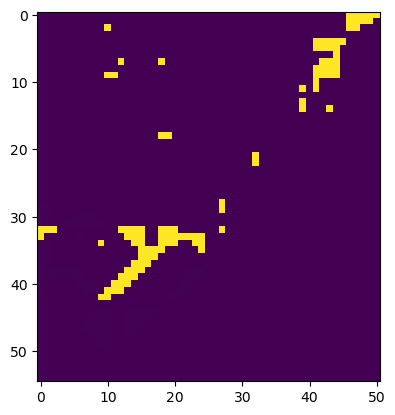

<AxesSubplot:>

In [6]:
a = np.array(a1)
pred1 = a.reshape(55,51)
rslt = np.unique(pred1)
print(rslt)
a = np.array(a2)
pred2 = a.reshape(55,51)
rslt = np.unique(pred2)
print(rslt)
temp1 = pred1 - pred2
"""
for i in range(316):
    for j in range(226):
        if(temp1[i][j]==1):
            temp1[i][j]=0
"""
rslt = np.unique(temp1)

print(rslt)
img3 = Image.fromarray(temp1)
img3.save('nn_diff_final_building2.png' )
show(img3)
